In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import CollisionModule

In [2]:
import torch

In [3]:
release_pos = np.load('./release_pos_1e8.npy')
velosity_matrix = np.load('./velosity_matrix_1e8.npy')
DXsec_Al = np.load('./DXsec_Al_1e8.npy')

(6565275, 3)


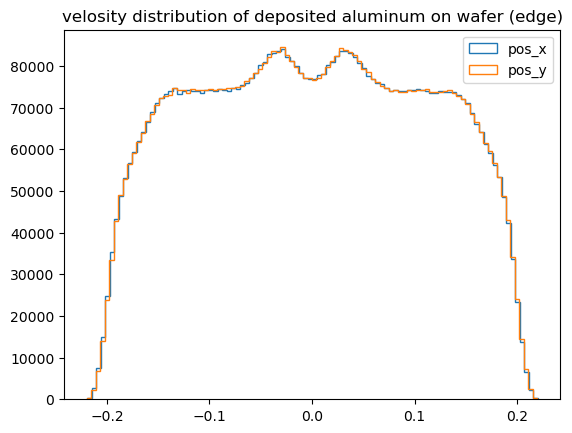

In [4]:
print(release_pos.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(release_pos[:,0], bins=100,histtype='step', stacked=True, fill=False, label='pos_x')
ax.hist(release_pos[:,1], bins=100,histtype='step', stacked=True, fill=False, label='pos_y')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

(6565275, 3)


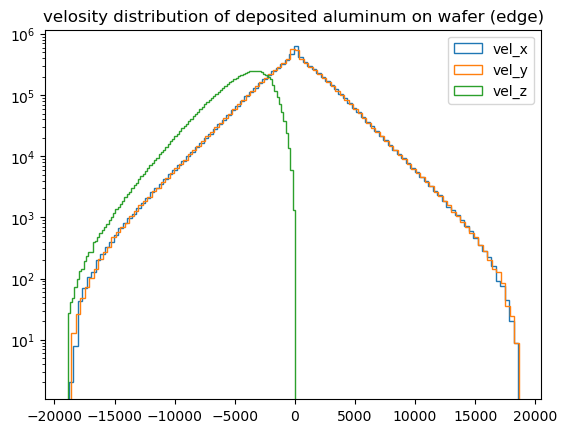

In [5]:
print(velosity_matrix.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [6]:
TS = 0.3 #300mm
release_pos[:,0] += 0.24
release_pos[:,1] += 0.24
release_pos[:,2] += TS
print(release_pos[:,0].min())
print(release_pos[:,0].max())
print(release_pos[:,1].min())
print(release_pos[:,1].max())

0.020771630986947898
0.459774927605747
0.020272437316419506
0.4594524202704513


In [7]:
transport = CollisionModule.transport(pressure_pa=0.1, timeStep= 1e-7, temperature=300, cellSize=[240, 240, 150], celllength=0.48/240, chamberSize=[0.24, 0.24], DXsec=DXsec_Al)
transport.setXsec(energy_range=[0, 50, 50])

l:\ysy\etching\CollisionModule.py:98: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*self.q))**(wi-1/2)*gamma(5/2 - wi))


array([0.00000000e+00, 2.48469445e-19, 2.13253357e-19, 1.95014882e-19,
       1.83028518e-19, 1.74240899e-19, 1.67375019e-19, 1.61781505e-19,
       1.57087507e-19, 1.53060285e-19, 1.49545376e-19, 1.46435341e-19,
       1.43652611e-19, 1.41139470e-19, 1.38851878e-19, 1.36755521e-19,
       1.34823170e-19, 1.33032883e-19, 1.31366734e-19, 1.29809902e-19,
       1.28350001e-19, 1.26976583e-19, 1.25680757e-19, 1.24454901e-19,
       1.23292430e-19, 1.22187624e-19, 1.21135481e-19, 1.20131605e-19,
       1.19172114e-19, 1.18253562e-19, 1.17372878e-19, 1.16527314e-19,
       1.15714403e-19, 1.14931921e-19, 1.14177857e-19, 1.13450388e-19,
       1.12747855e-19, 1.12068745e-19, 1.11411676e-19, 1.10775379e-19,
       1.10158690e-19, 1.09560536e-19, 1.08979929e-19, 1.08415954e-19,
       1.07867764e-19, 1.07334573e-19, 1.06815650e-19, 1.06310317e-19,
       1.05817939e-19, 1.05337924e-19])

In [8]:
result = transport.runE(p0=release_pos, v0=velosity_matrix, time=1e-3)

running: 100%|██████████████████████████████████████████████████████| 100/100 [35:34<00:00, 21.3s/B]


In [9]:
np.save('transport_TS300_result_posvel', result[2])

In [10]:
np.save('transport_TS300_result_collisionPos', result[1])

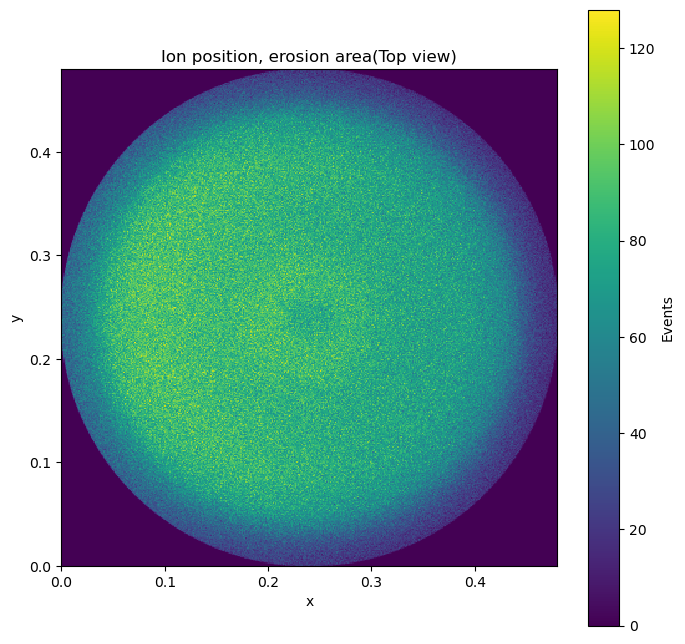

In [11]:
x_erosion_np = result[1][:,0]
y_erosion_np = result[1][:,1]

xbins = np.linspace(0,0.48,400)
ybins = np.linspace(0,0.48,400)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

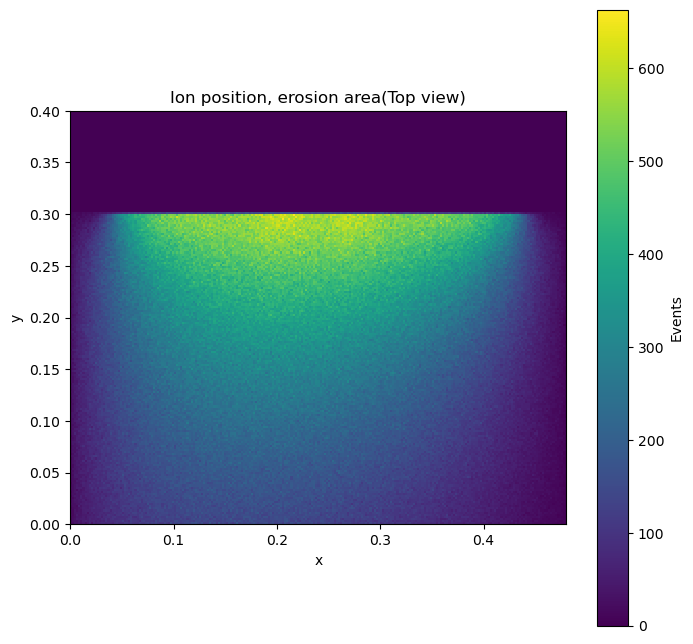

In [12]:
x_erosion_np = result[1][:,0]
z_erosion_np = result[1][:,2]

xbins = np.linspace(0,0.48,240)
zbins = np.linspace(0,0.4,200)
# zbins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
z_bins = np.histogram(z_erosion_np, bins=zbins)

H, xedges, zedges = np.histogram2d(x_erosion_np, z_erosion_np, bins=(xbins, zbins))

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [13]:
depo_pv = result[2]
a = np.array(depo_pv)
print(a.shape)

(2875210, 6)


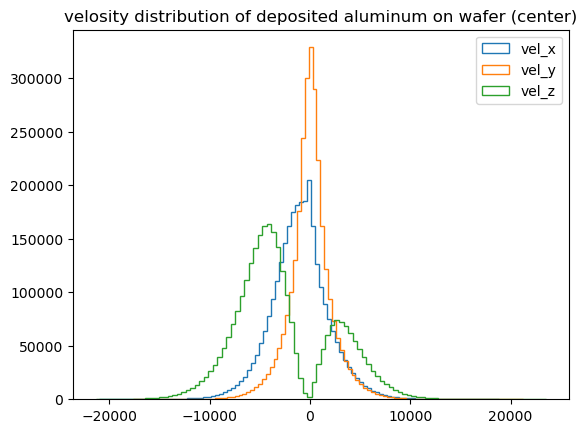

In [14]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(a[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(a[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(a[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

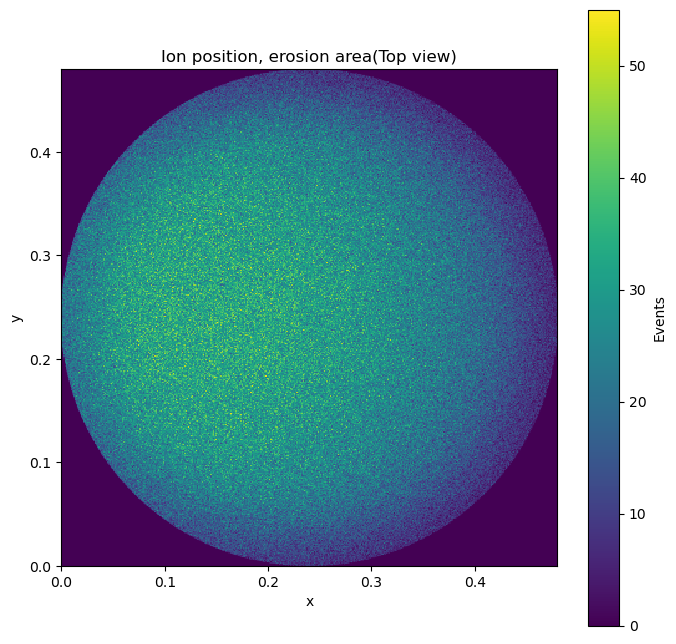

In [15]:
x_erosion_np = a[:,0]
y_erosion_np = a[:,1]

xbins = np.linspace(0,0.48,400)
ybins = np.linspace(0,0.48,400)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [16]:
center_indices = np.logical_and(a[:,0] > 0.2, a[:,0] < 0.28)
center_indices |= np.logical_and(a[:,1] > 0.2, a[:,1] < 0.28)
center_indices |= np.logical_and(a[:,2] > 0.2, a[:,2] > 0)

if np.any(center_indices):
    center_depo = a[~center_indices]

print(center_depo.shape)

(1185891, 6)


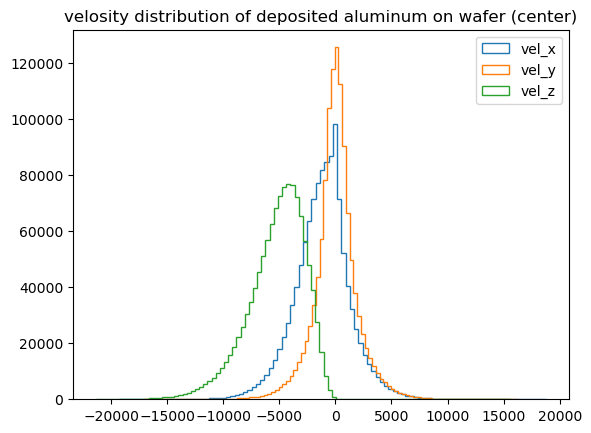

In [17]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(center_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(center_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(center_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [18]:
center_indices = np.logical_and(a[:,0] > 0.22, a[:,0] < 0.26)
center_indices |= np.logical_and(a[:,1] > 0.22, a[:,1] < 0.26)

if np.any(center_indices):
    center_depo = a[center_indices]

print(center_depo.shape)

(651887, 6)


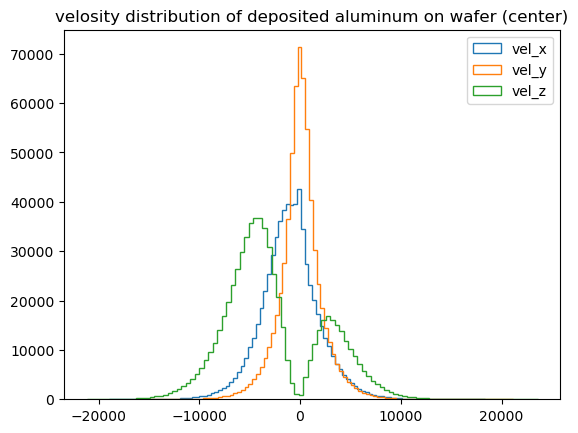

In [19]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(center_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(center_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(center_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [22]:
center_indices = np.logical_or(a[:,0] < 0.2, a[:,0] > 0.28)
center_indices |= np.logical_or(a[:,1] < 0.2, a[:,1] > 0.28)
center_indices |= np.array(a[:,2] > 0.01)

if np.any(center_indices):
    center_depo = a[~center_indices]

print(center_depo.shape)

(101063, 6)


In [23]:
for i in range(1):
    center_depo = np.concatenate((center_depo, center_depo), axis=0)

print(center_depo.shape)

(202126, 6)


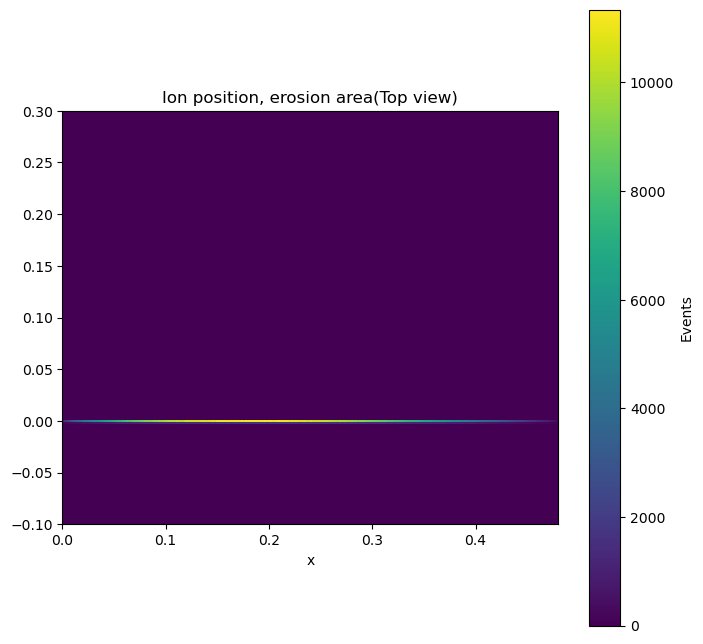

In [24]:
x_erosion_np = a[:,0]
z_erosion_np = a[:,2]

xbins = np.linspace(0,0.48,240)
zbins = np.linspace(-0.1,0.3,200)
# zbins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
z_bins = np.histogram(z_erosion_np, bins=zbins)

H, xedges, zedges = np.histogram2d(x_erosion_np, z_erosion_np, bins=(xbins, zbins))

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

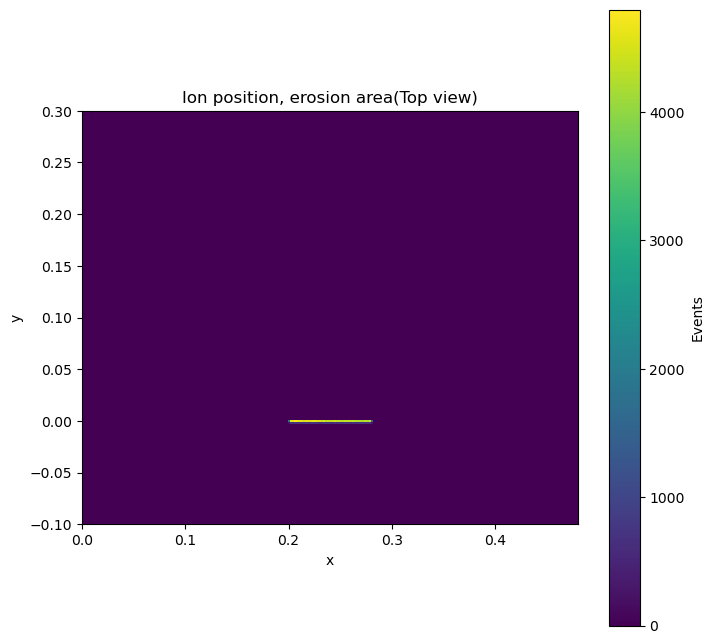

In [25]:
x_erosion_np = center_depo[:,0]
z_erosion_np = center_depo[:,2]

xbins = np.linspace(0,0.48,240)
zbins = np.linspace(-0.1,0.3,200)
# zbins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
z_bins = np.histogram(z_erosion_np, bins=zbins)

H, xedges, zedges = np.histogram2d(x_erosion_np, z_erosion_np, bins=(xbins, zbins))

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

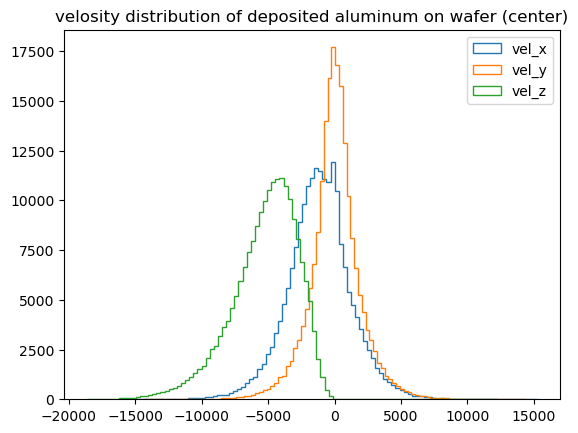

In [26]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(center_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(center_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(center_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [27]:
import depoSimulator_symmetry

In [28]:
film = np.zeros((88, 88, 120))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 30
left_side = 24
right_side = 24
film[:, 88-right_side:, 0:height] = 10
film[:, 0:left_side, 0:height] = 10
film[88-right_side:, :, 0:height] = 10
film[0:left_side, :, 0:height] = 10

In [25]:
substrute = torch.Tensor(film==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter()
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=5)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:64215/index.html?ui=P_0x26d011f4dd0_0&reconnect=auto" class="pyvis…

In [29]:
print(center_depo[:, 3:].shape)

(202126, 3)


In [30]:
test = depoSimulator_symmetry.depo(param = [1.6, -0.7], TS = 0.3, N = center_depo.shape[0], sub_xy=[0,0], film=film, n=1, cellSize=[88, 88, 120], celllength=1, kdtreeN=5, tstep=1e-4)
deposit = test.run_afterCollision(1, 125, center_depo[:, 3:])

running:   0%|                                                            | 0.00/100 [00:00<?, ?B/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
3
8
11
19
28
28
25
37
51
38
64
82
80
96
115
127
171
144
207
202
15
26
24
18
15
17
20
17
24
30
18
18
20
20
23
23
20
16
16
24
14
26
22
17
22
14
18
18
22
22
20
19
28
26
26
24
29
21
28
26
19
28
22
17
20
26
25
25
36
26
18
25
18
29
29
31
25
28
33
23
25
27
30
27
27
33
31
19
26
37
36
29
41
31
30
30
34
37
34
30
28
36
41
35
32
34
34
43
27
36
42
44
46
26
44
37
31
47
41
42
40
29
37
36
37
46
37
40
38
26
38
45
37
36
40
41
42
39
50
37
42
44
34
55
48
36
35
52
53
40
57
37
37
39
48
40
52
46
46
43
50
46
39
47
55
62
60
46
50
41
39
54
49
37
57
56
47
54
43
55
41
46
55
60
44
50
46
56
50
60
48
54
53
46
49
53
52
48
55
65
67
47
59
68
63
46
46
50
45
67
57
60
56
47
53
59
65
61
52
52
67
51
59
59
65
60
63
59
48
68
58
55
58
54
63
73
67
71
60
71
62
59
55
68
53
66
78
70
64
64
71
65
72
78
60
80
67
75
79
64
77
63
75
91
66
78
72
80
69
66
68
54
75
64
65
63
88
80
78
78
73
76
87
55
73
91
88
81
71
89
83
77
83
82
93
94
77
81
82
92
79

running:   1%|▌                                                  | 1.00/100 [07:24<12:13:43, 445s/B]

116
109
134
120
118
135
129
121
137
133
120
125
148
119
117
133
131
124
123
124
121
131
132
136
127
126
109
133
124
132
133
115
108
135
119
112
126
111
149
133
127
148
129
113
140
109
124
114
111
118
149
134
125
127
127
111
127
107
120
126
126
114
131
138
121
134
130
111
109
142
116
112
121
102
105
105
112
109
110
139
103
114
107
101
105
110
120
106
101
108
110
96
117
107
118
144
131
129
119
107
114
105
107
125
116
112
124
100
111
115
128
104
90
94
98
112
122
125
122
110
110
109
111
134
125
112
107
103
97
133
121
122
117
121
150
114
114
110
119
105
127
102
113
104
94
108
122
100
79
110
112
110
104
92
103
115
102
105
106
104
122
98
103
104
112
112
109
106
93
108
102
117
110
104
121
108
103
106
112
98
90
83
102
94
121
87
86
113
101
102
92
85
100
118
100
101
86
98
105
90
95
95
98
95
87
95
89
110
113
107
108
87
109
116
103
102
103
103
104
103
83
98
95
114
94
94
102
99
88
88
95
94
104
103
104
94
84
109
100
105
94
86
93
95
100
94
99
72
80
81
90
88
79
101
86
84
106
86
88
97
115
94
103
101
90


running:   2%|█                                                  | 2.00/100 [13:26<10:46:21, 396s/B]

23
33
30
23
19
30
27
18
34
23
30
25
28
32
31
31
26
33
32
41
33
32
32
29
35
31
25
28
30
28
35
25
21
33
28
27
28
20
26
29
31
29
34
22
19
22
25
19
29
29
29
33
26
22
31
29
32
33
26
23
23
19
25
23
26
26
17
23
26
24
21
33
35
28
24
23
19
23
27
27
25
21
30
26
30
24
24
22
28
18
25
23
26
17
29
18
18
23
29
29
25
22
28
24
29
28
34
30
27
17
30
25
31
29
25
30
19
24
23
20
24
23
21
22
21
22
24
27
23
20
27
17
24
26
24
23
22
23
26
19
21
16
25
24
13
19
25
26
21
27
22
19
23
29
14
18
23
23
33
19
22
35
25
30
19
20
25
24
19
34
30
16
23
18
24
19
25
13
21
21
27
19
21
23
25
18
23
17
20
16
14
20
19
20
32
21
21
27
29
18
21
27
26
23
21
21
14
19
22
11
17
20
14
15
16
14
14
17
16
14
21
23
19
17
29
23
25
24
20
25
25
25
14
16
19
18
20
22
21
20
19
23
17
22
12
19
16
17
19
17
12
25
22
21
23
19
25
19
20
23
15
25
18
17
13
23
20
29
17
24
17
17
12
20
15
16
24
15
27
22
20
22
21
20
18
18
24
15
23
18
23
21
19
12
24
27
15
17
23
21
21
21
22
21
21
19
15
19
16
24
10
14
12
18
18
21
20
22
21
30
16
20
23
13
13
25
28
17
22
16
12
10
22
1

running:   3%|█▌                                                  | 3.00/100 [15:35<7:23:13, 274s/B]

745
702
636
542
489
464
416
409
350
311


running:   4%|██                                                  | 4.00/100 [15:39<4:27:37, 167s/B]

270
252
242
229
199
181
162
159
136
148


running:   5%|██▌                                                 | 5.00/100 [15:42<2:51:13, 108s/B]

128
101
90
113
82
86
75
92
75
73


running:   6%|███                                                | 6.00/100 [15:45<1:53:38, 72.5s/B]

79
55
59
66
41
43
45
38
33
32


running:   7%|███▌                                               | 7.00/100 [15:49<1:17:37, 50.1s/B]

40
31
25
35
26
28
28
28
22
18


running:   8%|████▏                                                | 8.00/100 [15:53<54:07, 35.3s/B]

34
16
15
15
18
17
11
10
12
12


running:   9%|████▊                                                | 9.00/100 [15:56<38:13, 25.2s/B]

20
13
13
9
9
11
17
6
11
8


running:  10%|█████▎                                               | 10.0/100 [15:59<27:31, 18.3s/B]

5
8
9
10
5
13
5
12
4
6


running:  11%|█████▊                                               | 11.0/100 [16:02<20:09, 13.6s/B]

8
6
6
8
4
2
4
5
3
3


running:  12%|██████▎                                              | 12.0/100 [16:05<15:14, 10.4s/B]

7
5
2
3
5
5
4
4
2
4


running:  13%|██████▉                                              | 13.0/100 [16:08<11:50, 8.17s/B]

4
1
3
3
4
1
3
3
8
3


running:  14%|███████▍                                             | 14.0/100 [16:11<09:30, 6.64s/B]

2
1
2
2
2
1
3
1
2
1


running:  15%|███████▉                                             | 15.0/100 [16:14<07:58, 5.63s/B]

1
1
2
1
2
3
1
2
1
2


running:  16%|████████▍                                            | 16.0/100 [16:17<06:45, 4.83s/B]

4
1
1
0
0
1
0
0
0
4


running:  17%|█████████                                            | 17.0/100 [16:20<06:00, 4.34s/B]

1
1
0
2
1
0
0
0
1
0


running:  18%|█████████▌                                           | 18.0/100 [16:23<05:26, 3.98s/B]

4
1
1
0
1
3
2
1
4
0


running:  19%|██████████                                           | 19.0/100 [16:27<05:01, 3.72s/B]

0
1
0
5
1
2
2
3
0
2


running:  20%|██████████▌                                          | 20.0/100 [16:30<04:46, 3.58s/B]

1
1
2
4
2
1
0
1
0
4


running:  21%|███████████▏                                         | 21.0/100 [16:33<04:31, 3.44s/B]

1
1
2
0
2
3
0
3
1
1


running:  22%|███████████▋                                         | 22.0/100 [16:36<04:21, 3.35s/B]

1
3
2
0
0
0
2
1
0
0


running:  23%|████████████▏                                        | 23.0/100 [16:39<04:13, 3.29s/B]

0
0
3
0
0
0
0
0
1
1


running:  24%|████████████▋                                        | 24.0/100 [16:42<04:03, 3.21s/B]

0
0
1
0
0
1
0
1
0
0


running:  25%|█████████████▎                                       | 25.0/100 [16:45<03:58, 3.18s/B]

1
0
0
1
1
0
0
0
1
0


running:  26%|█████████████▊                                       | 26.0/100 [16:49<03:59, 3.23s/B]

1
0
0
0
1
0
1
0
0
0


running:  27%|██████████████▎                                      | 27.0/100 [16:52<03:59, 3.28s/B]

1
0
0
0
0
0
0
0
0
0


running:  28%|██████████████▊                                      | 28.0/100 [16:56<04:00, 3.34s/B]

0
0
0
0
0
1
0
0
0
1


running:  29%|███████████████▎                                     | 29.0/100 [16:59<04:00, 3.39s/B]

0
0
0
0
0
0
0
0
0
0


running:  30%|███████████████▉                                     | 30.0/100 [17:02<03:52, 3.32s/B]

0
0
0
1
0
2
0
0
0
0


running:  31%|████████████████▍                                    | 31.0/100 [17:05<03:44, 3.25s/B]

1
0
0
0
2
0
0
0
1
0


running:  32%|████████████████▉                                    | 32.0/100 [17:08<03:33, 3.14s/B]

0
0
0
0
0
0
0
0
0
0


running:  33%|█████████████████▍                                   | 33.0/100 [17:11<03:26, 3.08s/B]

0
0
0
0
0
0
1
1
0
0


running:  34%|██████████████████                                   | 34.0/100 [17:14<03:21, 3.06s/B]

0
0
0
0
0
0
0
0
0
1


running:  35%|██████████████████▌                                  | 35.0/100 [17:17<03:18, 3.05s/B]

0
0
0
1
0
0
0
0
0
0


running:  36%|███████████████████                                  | 36.0/100 [17:20<03:16, 3.07s/B]

0
0
0
1
0
0
0
1
0
0


running:  37%|███████████████████▌                                 | 37.0/100 [17:24<03:18, 3.15s/B]

0
0
0
0
0
0
0
0
0
0


running:  38%|████████████████████▏                                | 38.0/100 [17:27<03:14, 3.14s/B]

0
0
0
0
0
0
0
1
0
0


running:  39%|████████████████████▋                                | 39.0/100 [17:30<03:06, 3.05s/B]

0
0
0
0
0
0
0
0
0
0


running:  40%|█████████████████████▏                               | 40.0/100 [17:32<03:00, 3.00s/B]

0
0
0
0
0
0
0
0
0
0


running:  41%|█████████████████████▋                               | 41.0/100 [17:35<02:55, 2.98s/B]

1
0
0
0
0
0
1
0
0
0


running:  42%|██████████████████████▎                              | 42.0/100 [17:38<02:52, 2.97s/B]

0
0
0
1
0
0
0
0
0
0


running:  43%|██████████████████████▊                              | 43.0/100 [17:41<02:49, 2.97s/B]

0
1
0
0
0
0
0
0
0
0


running:  44%|███████████████████████▎                             | 44.0/100 [17:44<02:50, 3.04s/B]

0
0
1
0
1
0
0
0
0
0


running:  45%|███████████████████████▊                             | 45.0/100 [17:48<02:52, 3.13s/B]

0
0
0
0
0
0
0
0
0
0


running:  46%|████████████████████████▍                            | 46.0/100 [17:51<02:51, 3.18s/B]

0
0
0
0
0
1
0
0
1
0


running:  47%|████████████████████████▉                            | 47.0/100 [17:54<02:48, 3.17s/B]

0
0
0
0
0
0
0
0
0
1


running:  48%|█████████████████████████▍                           | 48.0/100 [17:57<02:44, 3.16s/B]

0
0
0
0
0
0
0
0
0
0


running:  49%|█████████████████████████▉                           | 49.0/100 [18:01<02:44, 3.22s/B]

0
0
0
0
0
1
0
0
0
0


running:  50%|██████████████████████████▌                          | 50.0/100 [18:04<02:42, 3.25s/B]

0
0
0
0
0
0
0
0
0
0


running:  51%|███████████████████████████                          | 51.0/100 [18:07<02:39, 3.25s/B]

0
0
0
0
0
0
0
0
0
0


running:  52%|███████████████████████████▌                         | 52.0/100 [18:11<02:39, 3.32s/B]

0
0
0
0
0
0
0
0
0
0


running:  53%|████████████████████████████                         | 53.0/100 [18:14<02:37, 3.34s/B]

0
0
0
0
0
0
0
0
0
0


running:  54%|████████████████████████████▌                        | 54.0/100 [18:17<02:31, 3.29s/B]

0
0
0
0
0
0
0
0
0
0


running:  55%|█████████████████████████████▏                       | 55.0/100 [18:21<02:26, 3.26s/B]

0
0
0
0
0
0
0
0
0
0


running:  56%|█████████████████████████████▋                       | 56.0/100 [18:24<02:21, 3.22s/B]

0
0
0
0
0
0
0
0
0
0


running:  57%|██████████████████████████████▏                      | 57.0/100 [18:27<02:19, 3.25s/B]

0
0
0
0
0
0
0
0
0
0


running:  58%|██████████████████████████████▋                      | 58.0/100 [18:31<02:20, 3.35s/B]

0
0
0
0
0
0
0
0
0
0


running:  59%|███████████████████████████████▎                     | 59.0/100 [18:34<02:12, 3.24s/B]

0
0
0
0
0
0
0
0
0
0


running:  60%|███████████████████████████████▊                     | 60.0/100 [18:37<02:06, 3.17s/B]

0
0
0
0
0
0
0
0
0
0


running:  61%|████████████████████████████████▎                    | 61.0/100 [18:39<01:59, 3.06s/B]

0
0
0
0
0
0
0
0
0
0


running:  62%|████████████████████████████████▊                    | 62.0/100 [18:42<01:54, 3.01s/B]

0
0
0
0
0
0
0
0
0
0


running:  63%|█████████████████████████████████▍                   | 63.0/100 [18:45<01:51, 3.01s/B]

0
0
0
0
0
0
0
0
0
0


running:  64%|█████████████████████████████████▉                   | 64.0/100 [18:48<01:48, 3.03s/B]

0
0
0
0
1
0
0
0
0
0


running:  65%|██████████████████████████████████▍                  | 65.0/100 [18:51<01:44, 3.00s/B]

0
0
0
0
0
1
0
0
0
0


running:  66%|██████████████████████████████████▉                  | 66.0/100 [18:54<01:41, 2.97s/B]

0
0
0
0
0
0
0
0
0
0


running:  67%|███████████████████████████████████▌                 | 67.0/100 [18:57<01:39, 3.02s/B]

0
0
0
0
0
0
0
0
0
0


running:  68%|████████████████████████████████████                 | 68.0/100 [19:01<01:38, 3.09s/B]

0
0
0
0
0
0
0
0
0
0


running:  69%|████████████████████████████████████▌                | 69.0/100 [19:04<01:34, 3.05s/B]

0
0
0
0
0
0
0
0
0
0


running:  70%|█████████████████████████████████████                | 70.0/100 [19:07<01:34, 3.14s/B]

0
0
0
0
0
0
0
0
0
0


running:  71%|█████████████████████████████████████▋               | 71.0/100 [19:10<01:30, 3.12s/B]

0
0
0
0
0
0
0
0
0
0


running:  72%|██████████████████████████████████████▏              | 72.0/100 [19:13<01:26, 3.10s/B]

0
0
0
0
0
0
0
0
0
0


running:  73%|██████████████████████████████████████▋              | 73.0/100 [19:16<01:22, 3.07s/B]

0
0
0
0
0
0
0
0
0
0


running:  74%|███████████████████████████████████████▏             | 74.0/100 [19:19<01:19, 3.05s/B]

0
0
0
0
0
0
0
0
0
0


running:  75%|███████████████████████████████████████▊             | 75.0/100 [19:22<01:16, 3.05s/B]

0
0
0
0
0
0
0
0
0
0


running:  76%|████████████████████████████████████████▎            | 76.0/100 [19:25<01:13, 3.07s/B]

0
0
0
0
0
0
0
0
0
0


running:  77%|████████████████████████████████████████▊            | 77.0/100 [19:28<01:09, 3.04s/B]

0
0
0
0
0
0
0
0
0
0


running:  78%|█████████████████████████████████████████▎           | 78.0/100 [19:31<01:06, 3.03s/B]

0
0
0
0
0
0
0
0
0
0


running:  79%|█████████████████████████████████████████▊           | 79.0/100 [19:34<01:05, 3.10s/B]

0
0
0
0
0
0
0
0
0
0


running:  80%|██████████████████████████████████████████▍          | 80.0/100 [19:38<01:02, 3.10s/B]

0
0
0
0
0
0
0
0
0
0


running:  81%|██████████████████████████████████████████▉          | 81.0/100 [19:41<00:58, 3.08s/B]

0
0
0
0
0
0
0
0
0
0


running:  82%|███████████████████████████████████████████▍         | 82.0/100 [19:44<00:55, 3.09s/B]

0
0
0
0
0
0
0
0
0
0


running:  83%|███████████████████████████████████████████▉         | 83.0/100 [19:47<00:53, 3.16s/B]

0
0
0
0
0
0
0
0
0
0


running:  84%|████████████████████████████████████████████▌        | 84.0/100 [19:50<00:50, 3.15s/B]

0
0
0
0
0
0
0
0
0
0


running:  85%|█████████████████████████████████████████████        | 85.0/100 [19:53<00:46, 3.11s/B]

0
0
0
0
0
0
0
0
0
0


running:  86%|█████████████████████████████████████████████▌       | 86.0/100 [19:56<00:43, 3.12s/B]

0
0
0
0
0
0
0
0
0
0


running:  87%|██████████████████████████████████████████████       | 87.0/100 [19:59<00:40, 3.14s/B]

0
0
0
0
0
0
0
0
0
0


running:  88%|██████████████████████████████████████████████▋      | 88.0/100 [20:03<00:37, 3.11s/B]

0
0
0
0
0
0
0
0
0
0


running:  89%|███████████████████████████████████████████████▏     | 89.0/100 [20:06<00:34, 3.16s/B]

0
0
0
0
0
0
0
0
0
0


running:  90%|███████████████████████████████████████████████▋     | 90.0/100 [20:09<00:31, 3.13s/B]

0
0
0
0
0
0
0
0
0
0


running:  91%|████████████████████████████████████████████████▏    | 91.0/100 [20:12<00:28, 3.15s/B]

0
0
0
0
0
0
0
0
0
0


running:  92%|████████████████████████████████████████████████▊    | 92.0/100 [20:15<00:24, 3.08s/B]

0
0
0
0
0
0
0
0
0
0


running:  93%|█████████████████████████████████████████████████▎   | 93.0/100 [20:18<00:21, 3.11s/B]

0
0
0
0
0
0
0
0
0
0


running:  94%|█████████████████████████████████████████████████▊   | 94.0/100 [20:21<00:18, 3.11s/B]

0
0
0
0
0
0
0
0
0
0


running:  95%|██████████████████████████████████████████████████▎  | 95.0/100 [20:24<00:15, 3.11s/B]

0
0
0
0
0
0
0
0
0
0


running:  96%|██████████████████████████████████████████████████▉  | 96.0/100 [20:27<00:12, 3.07s/B]

0
0
0
0
0
0
0
0
0
0


running:  97%|███████████████████████████████████████████████████▍ | 97.0/100 [20:30<00:09, 3.06s/B]

0
0
0
0
0
0
0
0
0
0


running:  98%|███████████████████████████████████████████████████▉ | 98.0/100 [20:33<00:06, 3.06s/B]

0
0
0
0
0
0
0
0
0
0


running:  99%|████████████████████████████████████████████████████▍| 99.0/100 [20:36<00:03, 3.02s/B]

0
0
0


running:  99%|████████████████████████████████████████████████████▍| 99.0/100 [20:37<00:12, 12.5s/B]


In [24]:
deposit = test.run_afterCollision(2, 88, center_depo[:, 3:])

running: 100%|██████████████████████████████████████████████████████| 100/100 [03:34<00:00, 2.15s/B]


In [23]:
deposit = test.run_afterCollision(1, 1035, center_depo[:, 3:])

running: 100%|██████████████████████████████████████████████████████| 100/100 [04:21<00:00, 2.61s/B]


In [25]:
deposit = test.run_afterCollision(1, 1037, center_depo[:, 3:])

running: 100%|██████████████████████████████████████████████████████| 100/100 [03:46<00:00, 2.27s/B]


In [34]:
np.save('./TScompare/TS300_afterCollision_0522_v2_run1_t1e-5_p4e6', deposit)

In [31]:
depo1 = torch.Tensor(deposit[20:46, 20:68, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[20:46, 20:68, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:51429/index.html?ui=P_0x1fb0606bc10_0&reconnect=auto" class="pyvis…

In [32]:
depo1 = torch.Tensor(deposit[20:68, 20:68, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[20:68, 20:68, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:51429/index.html?ui=P_0x1fb15d4a890_1&reconnect=auto" class="pyvis…

In [33]:
depo1 = torch.Tensor(deposit[:, :, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:51429/index.html?ui=P_0x1fb15dadb50_2&reconnect=auto" class="pyvis…

In [40]:
edge_indices = np.logical_and(a[:,0] > 0.2, a[:,0] < 0.28)
edge_indices |= np.logical_and(a[:,1] > 0.02, a[:,1] < 0.1)
edge_indices |= np.logical_and(a[:,2] > 0.2, a[:,2] > 0)

if np.any(edge_indices):
    edge_depo = a[edge_indices]

print(edge_depo.shape)

(177785, 6)


In [75]:
edge_indices = np.logical_or(a[:,0] < 0.2, a[:,0] > 0.28)
edge_indices |= np.logical_or(a[:,1] < 0.02, a[:,1] > 0.1)
edge_indices |= np.array(a[:,2] > 0.01)

if np.any(edge_indices):
    edge_depo = a[~edge_indices]

print(edge_depo.shape)

(21228, 6)


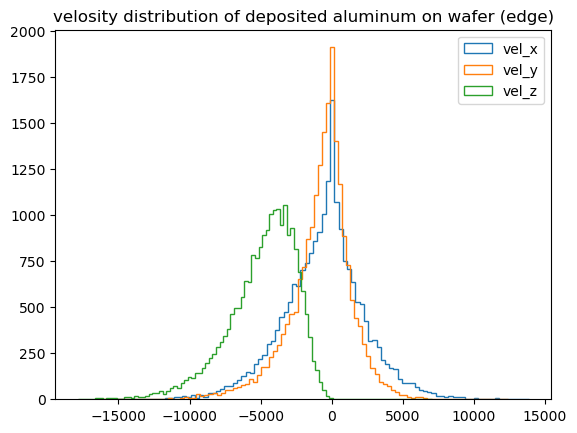

In [76]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(edge_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(edge_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(edge_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()